# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Uses the Python requests library to make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Uses the json.dumps function to review the response data from the API call
# Uses the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response,indent=4,sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19018987,
            "id": 1,
            "last_updated": 1650644922,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 748944830602,
                    "percent_change_1h": -0.825607211590351,
                    "percent_change_24h": -5.93599949876588,
                    "percent_change_7d": -1.17429398607428,
                    "percentage_change_1h": -0.825607211590351,
                    "percentage_change_24h": -5.93599949876588,
                    "percentage_change_7d": -1.17429398607428,
                    "price": 39490.0,
                    "volume_24h": 46849531612
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19018987,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [8]:
# Uses the Python requests library to make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Uses the json.dumps function to review the response data from the API call
# Uses the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response,indent=4,sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120484119,
            "id": 1027,
            "last_updated": 1650644968,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 355423089163,
                    "percent_change_1h": -0.40984674069339,
                    "percent_change_24h": -4.38196430879506,
                    "percent_change_7d": -2.05223492207156,
                    "percentage_change_1h": -0.40984674069339,
                    "percentage_change_24h": -4.38196430879506,
                    "percentage_change_7d": -2.05223492207156,
                    "price": 2961.37,
                    "volume_24h": 19577030766
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120484119,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [66]:
# Navigates the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Prints the current price of BTC
print(f'The current price of BTC is ${btc_price:.2f}')


The current price of BTC is $39490.00


In [65]:
# Navigates the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# Prints the current price of ETH
print(f'The current price of ETH is ${eth_price:.2f}')


The current price of ETH is $2961.37


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [64]:
# Computes the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Prints current value of your holding in BTC
print(f'The current value of your holdings in BTC is ${btc_value:.2f}')


The current value of your holdings in BTC is $47388.00


In [63]:
# Computes the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Prints current value of your holding in ETH
print(f'The current value of your holdings in ETH is ${eth_value:.2f}')


The current value of your holdings in ETH is $15695.26


In [62]:
# Computes the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Prints current cryptocurrency wallet balance
print(f'The current balance of the crypto portion of the portfolio is ${total_crypto_wallet:.2f}')


The current balance of the crypto portion of the portfolio is $63083.26


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Sets the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Creates the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Sets the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

# Sets timeframe to 1Day
timeframe = '1Day'

# Formats current date as ISO format
start_date = pd.Timestamp('2022-04-11',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-11',tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Uses the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# Reorganizes the DataFrame
# Separates ticker data
spy_prices = prices_df[prices_df['symbol']=='SPY'].drop('symbol',axis=1)
agg_prices = prices_df[prices_df['symbol']=='AGG'].drop('symbol',axis=1)
# Concatenates the ticker DataFrames
prices_df = pd.concat([spy_prices,agg_prices],axis=1,keys=['SPY','AGG'])

# Reviews the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                   \
                             open   high     low   close    volume   
timestamp                                                            
2022-04-11 04:00:00+00:00  444.11  445.0  439.39  439.92  89825549   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-04-11 04:00:00+00:00      779421  442.206374  104.44  104.505  104.17   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-11 04:00:00+00:00  104.28  8377902       29767  104.312835

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [56]:
# Accesses the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Prints the AGG closing price
print(f'The closing price of AGG is ${agg_close_price:.2f}')


The closing price of AGG is $104.28


In [57]:
# Accesses the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Prints the SPY closing price
print(f'The closing price of AGG is ${spy_close_price:.2f}')


The closing price of AGG is $439.92


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [58]:
# Calculates the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Prints the current value of the bond portfolio
print(f'The current value of AGG is ${agg_value:.2f}')


The current value of AGG is $20856.00


In [59]:
# Calculates the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Prints the current value of the stock portfolio
print(f'The current value of AGG is ${spy_value:.2f}')


The current value of AGG is $48391.20


In [60]:
# Calculates the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Prints the current balance of the stock and bond portion of the portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $69247.20


In [61]:
# Calculates the total value of the member's entire savings portfolio
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Prints current wallet balance
print(f'The current balance of the entire portfolio is ${total_portfolio:.2f}')


The current balance of the entire portfolio is $132330.46


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidates financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Reviews the Python list savings_data
savings_data
    

[63083.261, 69247.20000000001]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Creates a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=['amount'],index=['crypto','stock/bond'])

# Displays the savings_df DataFrame
savings_df


,amount
crypto,63083.261
stock/bond,69247.200


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of Portfolio'}, ylabel='amount'>

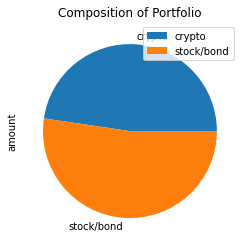

In [26]:
# Plots the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount',title='Composition of Portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Creates a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluates the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    display("Congratulations, you have more than enough money in your emergency fund!")
elif total_portfolio == emergency_fund_value:
    display("Congratulations, you have just enough money in your emergency fund. This is a very important financial mile stone.")
else:
    short = emergency_fund_value - total_portfolio
    print(f"Unfortunately, you are ${short:.2f} short of reaching your emergency fund goal.")


'Congratulations, you have more than enough money in your emergency fund!'

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [33]:
# Sets start and end dates of 3 years back from your current date 
start_date = pd.Timestamp('2019-04-11',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-11',tz='America/New_York').isoformat()

# Sets number of rows to 1000 to retrieve the maximum amount of rows
limit=1000

In [34]:
# Uses the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
three_year_prices_df = alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# Reorganizes the DataFrame
# Separates ticker data
three_year_spy_prices = three_year_prices_df[three_year_prices_df['symbol']=='SPY'].drop('symbol',axis=1)
three_year_agg_prices = three_year_prices_df[three_year_prices_df['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenates the ticker DataFrames
three_year_prices_df = pd.concat([three_year_spy_prices,three_year_agg_prices],axis=1,keys=['SPY','AGG'])

# Displays both the first and last five rows of the DataFrame
display(three_year_prices_df.head())
display(three_year_prices_df.tail())


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-11 04:00:00+00:00  288.84  288.840  287.578  288.21  55098100   
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-04-11 04:00:00+00:00      205244  288.161064  108.53  108.5300  108.42   
2019-04-12 04:00:00+00:00      232166  289.776012  108.26  108.3500  108.22   
2019-04-15 04:00:00+00:00      199622  289.773677  108.21  108.3000  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078  108.12  108.2100  108.02   
2019-04-17 04:00:00+00:00      245037  289.770682  108.09  108.1899  108.05   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-11 04:00:00+00:00  108.48  2827701       11884  108.476795  
2019-04-12 04:00:00+00:00  108.27  2430609       11376  108.269606  
2019-04-15 04:00:00+00:00  108.25  2546204       10053  108.253507  
2019-04-16 04:00:00+00:00  108.06  4093950       12649  108.108731  
2019-04-17 04:00:00+00:00  108.05  3390171        9569  108.090758

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-05 04:00:00+00:00  455.23  457.83  449.82  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.93  443.47  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.53  448.77   77538519   
2022-04-08 04:00:00+00:00  448.04  450.63  445.94  447.57   79148376   
2022-04-11 04:00:00+00:00  444.11  445.00  439.39  439.92   89825549   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-04-05 04:00:00+00:00      644313  453.412462  106.60  106.625  105.740   
2022-04-06 04:00:00+00:00      901634  446.345270  105.20  105.805  105.115   
2022-04-07 04:00:00+00:00      628673  447.098209  105.38  105.510  105.130   
2022-04-08 04:00:00+00:00      573491  448.250805  104.82  105.010  104.615   
2022-04-11 04:00:00+00:00      779421  442.206374  104.44  104.505  104.170   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-05 04:00:00+00:00  105.76  11018430       34684  105.931526  
2022-04-06 04:00:00+00:00  105.49  13322630       47090  105.463015  
2022-04-07 04:00:00+00:00  105.26   7921117       25631  105.278761  
2022-04-08 04:00:00+00:00  104.73   6501822       24900  104.804999  
2022-04-11 04:00:00+00:00  104.28   8377902       29767  104.312835

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [35]:
# Configures the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Runs 500 samples.
MC_sim = MCSimulation(three_year_prices_df,weights=[0.6,0.4],num_simulation=500,num_trading_days=252*30)

# Reviews the simulation input data
MC_sim.portfolio_data.head()


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-11 04:00:00+00:00  288.84  288.840  287.578  288.21  55098100   
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-11 04:00:00+00:00      205244  288.161064          NaN  108.53   
2019-04-12 04:00:00+00:00      232166  289.776012     0.006766  108.26   
2019-04-15 04:00:00+00:00      199622  289.773677    -0.000655  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078     0.000655  108.12   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2019-04-11 04:00:00+00:00  108.5300  108.42  108.48  2827701       11884   
2019-04-12 04:00:00+00:00  108.3500  108.22  108.27  2430609       11376   
2019-04-15 04:00:00+00:00  108.3000  108.21  108.25  2546204       10053   
2019-04-16 04:00:00+00:00  108.2100  108.02  108.06  4093950       12649   
2019-04-17 04:00:00+00:00  108.1899  108.05  108.05  3390171        9569   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-11 04:00:00+00:00  108.476795          NaN  
2019-04-12 04:00:00+00:00  108.269606    -0.001936  
2019-04-15 04:00:00+00:00  108.253507    -0.000185  
2019-04-16 04:00:00+00:00  108.108731    -0.001755  
2019-04-17 04:00:00+00:00  108.090758    -0.000093

In [36]:
# Runs the Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/robbyodum/Desktop/FinTech-Workspace/Challenge_Files/Financial_Planning_Analysis/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993575,1.003085,1.000178,1.011893,1.008741,0.998628,0.982247,1.001023,0.999936,0.988291,...,0.986316,0.982962,1.017702,0.991012,0.992093,1.007177,0.990745,1.003175,1.008083,0.996603
2,1.000058,1.010486,1.001796,1.005002,1.013368,0.983539,0.980770,1.011774,0.998568,0.979007,...,1.001050,0.969559,1.033329,0.992528,0.993133,1.013620,0.979008,0.985830,1.002145,0.995280
3,0.993074,1.024019,0.999830,1.005603,1.027716,0.975867,0.977738,1.013984,0.999323,0.986704,...,0.992878,0.958762,1.038920,0.997569,1.004947,1.018136,0.961103,0.988810,0.991989,0.994665
4,0.985449,1.005457,0.980010,0.988397,1.030024,0.982868,0.981548,1.016849,1.001451,0.987794,...,0.990819,0.968250,1.051013,0.999380,0.996857,1.024989,0.952268,1.003575,0.996663,0.995094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.025280,7.625633,6.276531,35.024786,12.798655,6.032942,18.369419,10.888200,11.649206,45.053487,...,41.306804,10.527040,27.084169,20.203717,10.937464,19.379396,22.137457,6.918282,18.743151,14.331002
7557,15.278571,7.607513,6.379028,35.148023,12.732705,6.037149,18.315726,10.855028,11.686298,45.442713,...,40.919398,10.751456,27.126070,20.093194,10.994406,19.512110,21.973148,6.866985,19.143453,14.549989
7558,15.305830,7.638451,6.443622,35.195816,12.770303,6.032144,18.223340,10.833739,11.738471,45.567137,...,41.214480,10.830445,27.432352,20.002096,10.982606,19.537967,22.010624,6.806787,19.161620,14.489893
7559,15.281068,7.729961,6.477800,35.064388,12.835853,6.115290,17.924364,10.956478,11.805299,46.349377,...,41.044068,10.897181,27.713138,20.011242,10.885883,19.696633,21.856929,6.763473,19.056082,14.500863


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

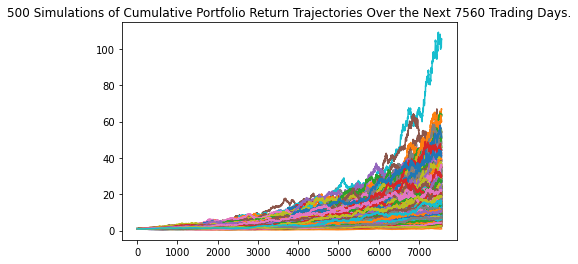

In [40]:
# Visualizes the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

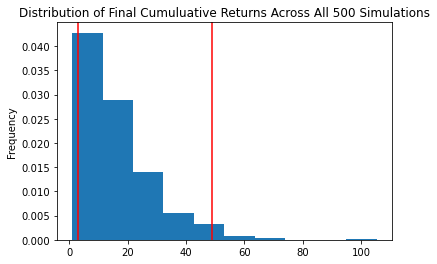

In [41]:
# Visualizes the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [42]:
# Generates summary statistics from the 30-year Monte Carlo simulation results
# Saves the results as a variable
MC_sim_summary = MC_sim.summarize_cumulative_return()


# Reviews the 30-year Monte Carlo summary statistics
MC_sim_summary

count           500.000000
mean             16.584522
std              12.425802
min               1.021214
25%               7.850713
50%              12.472570
75%              22.033329
max             105.220377
95% CI Lower      2.911291
95% CI Upper     48.863926
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [53]:
# Prints the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $69247.20


In [47]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_sim_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_sim_summary[9] * total_stocks_bonds
# Prints the result of your calculations
print(f'The lower range is ${ci_lower_thirty_cumulative_return:.2f}')
print(f'the upper range is ${ci_upper_thirty_cumulative_return:.2f}')

The lower range is $201598.73
the upper range is $3383690.05


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [48]:
# Configures a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_sim_short = MCSimulation(three_year_prices_df,weights=[.8,.2],num_simulation=500,num_trading_days=252*10)

# Reviews the simulation input data
MC_sim_short.portfolio_data.head()


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-11 04:00:00+00:00  288.84  288.840  287.578  288.21  55098100   
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-11 04:00:00+00:00      205244  288.161064          NaN  108.53   
2019-04-12 04:00:00+00:00      232166  289.776012     0.006766  108.26   
2019-04-15 04:00:00+00:00      199622  289.773677    -0.000655  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078     0.000655  108.12   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2019-04-11 04:00:00+00:00  108.5300  108.42  108.48  2827701       11884   
2019-04-12 04:00:00+00:00  108.3500  108.22  108.27  2430609       11376   
2019-04-15 04:00:00+00:00  108.3000  108.21  108.25  2546204       10053   
2019-04-16 04:00:00+00:00  108.2100  108.02  108.06  4093950       12649   
2019-04-17 04:00:00+00:00  108.1899  108.05  108.05  3390171        9569   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-11 04:00:00+00:00  108.476795          NaN  
2019-04-12 04:00:00+00:00  108.269606    -0.001936  
2019-04-15 04:00:00+00:00  108.253507    -0.000185  
2019-04-16 04:00:00+00:00  108.108731    -0.001755  
2019-04-17 04:00:00+00:00  108.090758    -0.000093

In [49]:
# Runs the Monte Carlo simulation to forecast 10 years cumulative returns
MC_sim_short.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/robbyodum/Desktop/FinTech-Workspace/Challenge_Files/Financial_Planning_Analysis/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996606,1.006653,0.983597,0.992559,1.002828,0.988915,0.998874,0.983353,0.999870,1.018966,...,1.010689,1.005519,1.001370,1.001300,0.990204,0.983166,1.011467,1.006355,1.000789,1.009040
2,0.998625,0.999656,0.988779,0.988998,0.992300,0.974263,1.004074,0.994479,1.013825,1.015003,...,1.013305,1.009691,0.996880,0.989766,1.003684,0.980688,1.007778,1.013793,1.006603,1.005318
3,1.007030,1.004747,1.004011,0.992034,0.986881,0.986287,0.997521,0.992523,1.005415,1.003423,...,1.002323,1.007015,1.005070,1.002780,0.989452,0.974268,1.008198,1.015967,1.015521,1.010341
4,1.010988,0.983048,0.981640,0.986773,1.000658,0.982582,0.987289,1.001893,0.990851,0.996871,...,1.005589,1.007479,1.003932,1.003842,0.969040,0.986038,1.018692,1.025084,1.013491,1.016395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.396170,1.598821,2.745721,1.999350,5.011782,0.915831,7.512722,7.055579,3.092973,4.875074,...,6.181897,6.039632,4.135614,1.128965,5.994742,1.351504,2.352034,3.392628,1.869482,2.722711
2517,1.390917,1.623936,2.749135,1.949826,5.035072,0.925387,7.529636,7.003175,3.126220,4.824454,...,6.115555,6.057738,4.119849,1.122214,6.028615,1.382850,2.384592,3.359779,1.898014,2.774185
2518,1.388274,1.607454,2.738760,1.943022,5.026985,0.931585,7.500032,7.058928,3.124459,4.867650,...,6.261958,5.992705,4.188103,1.105265,5.926638,1.432733,2.423848,3.381648,1.938825,2.798177
2519,1.381139,1.599152,2.732389,1.937474,4.976825,0.927527,7.616339,7.223436,3.141360,4.816625,...,6.182150,5.953807,4.207020,1.110782,5.877210,1.447515,2.467817,3.360238,1.936748,2.793498


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

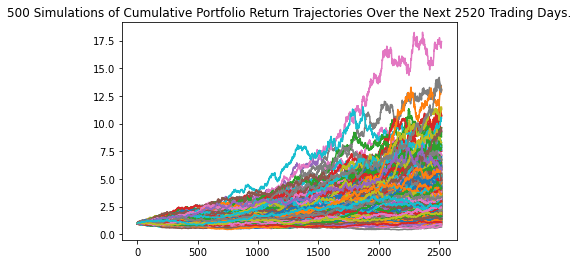

In [50]:
# Visualizes the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_short.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

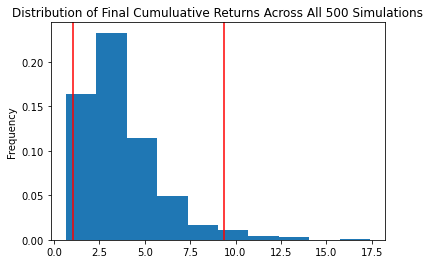

In [51]:
# Visualizes the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_short.plot_distribution()


In [52]:
# Generates summary statistics from the 10-year Monte Carlo simulation results
# Saves the results as a variable
MC_sim_short_summary = MC_sim_short.summarize_cumulative_return()


# Reviews the 10-year Monte Carlo summary statistics
MC_sim_short_summary

count           500.000000
mean              3.694403
std               2.180351
min               0.652532
25%               2.272357
50%               3.219369
75%               4.657535
max              17.412934
95% CI Lower      1.051402
95% CI Upper      9.368194
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [54]:
# Prints the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $69247.20


In [55]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_sim_short_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_sim_short_summary[9] * total_stocks_bonds

# Print the result of your calculations
print(f'The lower range is ${ci_lower_ten_cumulative_return:.2f}')
print(f'the upper range is ${ci_upper_ten_cumulative_return:.2f}')


The lower range is $72806.67
the upper range is $648721.19


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?